In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
DATA_PATH = os.path.join(os.getcwd(),'data','User_Data.csv')
df = pd.read_csv(DATA_PATH)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.drop(['User ID','Gender'],axis=1)

In [11]:
df = df.rename({'EstimatedSalary':'Salary'},axis=1)

In [14]:
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        400 non-null    int64
 1   Salary     400 non-null    int64
 2   Purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 12.5 KB


In [16]:
df.isna().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

In [23]:
x = df.iloc[:,[0,1]].values
y = df.iloc[:,[2]].values

In [49]:
def get_purchase_label(p):
    if p == 0:
        return 'Not Purchased'
    else:
        return 'Purchased'

In [34]:
targetdf = df['Purchased'].value_counts().reset_index()

In [51]:
targetdf ['Purchased'] = targetdf['Purchased'].map(get_purchase_label)

In [52]:
targetdf

,Purchased,count
0,Not Purchased,257
1,Purchased,143


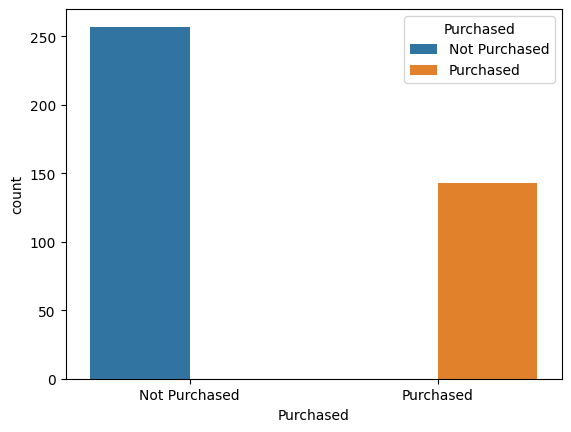

In [53]:
sns.barplot(targetdf,y='count',x='Purchased',hue='Purchased');

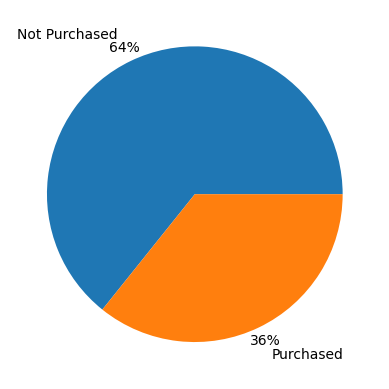

In [61]:
plt.pie(df['Purchased'].value_counts(),labels=['Not Purchased','Purchased'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);
plt.show() 

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [297]:
print(X_test.shape)
print(y_test.shape)

(80, 2)
(80, 1)


In [69]:
print('\n X train\n',X_train[:10],'\n y train\n',y_train[:10])


 X train
 [[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]] 
 y train
 [[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]]


In [70]:
from sklearn.preprocessing import StandardScaler

In [74]:
scl = StandardScaler()

X_train = scl.fit_transform(X_train)
X_test = scl.fit_transform(X_test)

In [75]:
print("Independent class\n", X_train[:10])

Independent class
 [[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]
 [ 0.36757813  0.29180308]
 [ 0.17315664  0.14694273]
 [ 2.02016082  1.74040666]
 [ 0.75642112 -0.83810771]
 [ 0.27036739 -0.28763835]]


## Training The Model

In [76]:
from sklearn.linear_model import LogisticRegression

In [84]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Accuracy of the model

In [83]:
from sklearn.metrics import accuracy_score

In [88]:
print(f' Train ACC :  {accuracy_score(y_train,y_train_predict)}')
print(f' Test ACC :  {accuracy_score(y_test,y_test_predict)}')

 Train ACC :  0.821875
 Test ACC :  0.8875


In [89]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,recall_score,precision_score

In [93]:
print(confusion_matrix(y_train,y_train_predict))
print(confusion_matrix(y_test,y_test_predict))

[[181  18]
 [ 39  82]]
[[52  6]
 [ 3 19]]


In [94]:
print(recall_score(y_train,y_train_predict))
print(recall_score(y_test,y_test_predict))

0.6776859504132231
0.8636363636363636


In [95]:
print(precision_score(y_train,y_train_predict))
print(precision_score(y_test,y_test_predict))

0.82
0.76


In [ ]:
print(f' Train ACC :  {accuracy_score(y_train,y_train_predict)}')

<h3> Visualizing training dataset meshgrid <Span style='color:red'>( Finding Decision Boundries )</Span></h3>

- Let’s visualize the training set of our model.
-  We will use **ListedColormap** class of the matplotlib module.
-  We will create two new variables **x_set** and **y_set** to replace **X_train** and **y_train**.
-  We will use the **np.meshgrid** command to create a rectangular grid , which ranges from -1 to 1.
-  The pixel points we have taken will be of **0.01 resolution**.
-  We will use the **plt.contourf** method to paint **red** and **yellow** regions.
-  The **clf.predict** method allows showing the predicted data points predicted by the classifier **( LogisticRegression() )**.

In [96]:
from matplotlib.colors import ListedColormap

In [166]:
x_set, y_Set = X_train, y_train
x_set[:3]

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ]])

In [186]:
arr0 = np.arange(start=x_set[:, 0].min()-1,stop=x_set[:,0].max()+1,step=0.01)
arr1 = np.arange(start = x_set[:1].min()-1,stop=x_set[:,1].max()+1,step=0.01)

In [187]:
X,Y = np.meshgrid(arr0,arr1)

In [191]:
X.shape

(240, 609)

In [190]:
Y.shape

(240, 609)

### ploting 
### Z Value ( For Plotting Classes )

In [193]:
#clf.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

In [195]:
X.ravel().shape

(146160,)

In [196]:
Y.ravel().shape

(146160,)

In [197]:
X.shape

(240, 609)

##### We Need Value For Z --> Z_Predict  ( Plotting Classes ) With Shape Look Like X and Y

In [206]:
x_new_train = np.array([X.ravel(), Y.ravel()]).T

In [342]:
x_new_train

array([[-2.96547978,  0.92295008],
       [-2.95547978,  0.92295008],
       [-2.94547978,  0.92295008],
       ...,
       [ 3.09452022,  3.31295008],
       [ 3.10452022,  3.31295008],
       [ 3.11452022,  3.31295008]])

In [343]:
x_new_train.shape

(146160, 2)

In [212]:
Z_Predict = clf.predict(x_new_train).reshape(X.shape)

In [213]:
Z_Predict.shape

(240, 609)

##### contourf of matplotlib Draw Grid (mesh x,y,z) 
- X ( Axis X )
- Y (axis Y)
- Z ( Predicted Classes result [0 or 1] )
- contourf(X, Y, Z,alpha = 0.75, cmap = ListedColormap(('red','yellow')))  

C:\Users\userr620\AppData\Local\Temp\ipykernel_18284\2165889017.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[res.ravel(), 0],x_set[res.ravel(), 1],


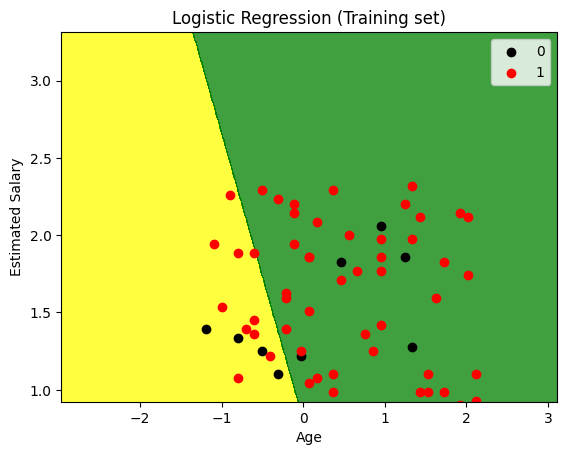

In [274]:
plt.contourf(X,Y,Z_Predict,alpha = 0.75,cmap=ListedColormap(('yellow','green')))

plt.xlim(X.min(), X.max())  
plt.ylim(Y.min(), Y.max())  

# for loop to iterate the data
for i, j in enumerate(np.unique(y_set)):  
    res = y_set == j
    plt.scatter(x_set[res.ravel(), 0],x_set[res.ravel(), 1],  
        c = ListedColormap(('black', 'red'))(i), label = j) 
# labeling the graph
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()

### Plot X_test

In [312]:
x_set, y_set = X_test, y_test  
XTest, YTest = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
XTest.shape

(621, 586)

In [313]:
YTest.shape

(621, 586)

In [335]:
Z_predict = clf.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(XTest.shape)

In [336]:
Z_predict.shape

(621, 586)

C:\Users\userr620\AppData\Local\Temp\ipykernel_18284\1051197397.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[res.ravel(), 0],x_set[res.ravel(), 1],


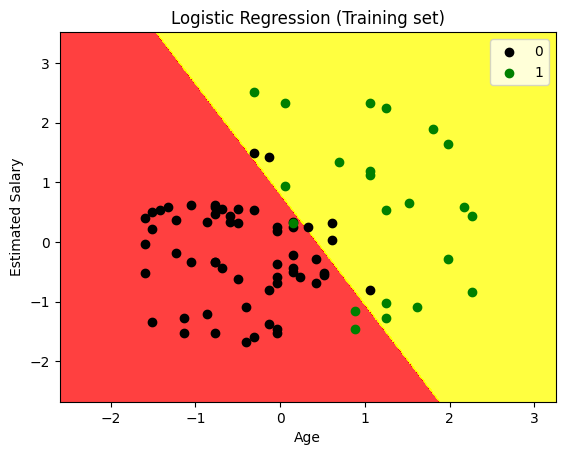

In [339]:
plt.contourf(XTest, YTest, Z_predict,  
alpha = 0.75, cmap = ListedColormap(('red','yellow' )))  

plt.xlim(XTest.min(), XTest.max())  
plt.ylim(YTest.min(), YTest.max())  

# for loop to iterate the data
for i, j in enumerate(np.unique(y_set)):  
    res = y_set == j
    plt.scatter(x_set[res.ravel(), 0],x_set[res.ravel(), 1],  
        c = ListedColormap(('black', 'green'))(i), label = j) 
# labeling the graph
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()


In [341]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        58
           1       0.76      0.86      0.81        22

    accuracy                           0.89        80
   macro avg       0.85      0.88      0.86        80
weighted avg       0.89      0.89      0.89        80

